In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Load data - train/ test

In [140]:
# features_list = ['source_node', 'destination_node','indicator_link','jaccard_followers', 'jaccard_followees', 'cosine_followers',
#        'cosine_followees', 'num_followers_s', 'num_followers_d',
#        'num_followees_s', 'num_followees_d', 'inter_followers', 'inter_followees']
#train = pd.read_csv('data_from_train/1st_features_train.csv', header = None)

features_list = ['source_node', 'destination_node','indicator_link','jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'page_rank_s', 'page_rank_d', 'katz_s', 'katz_d',
       'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d']
train = pd.read_csv('data/features_train.csv', header = None)

In [141]:
train.columns = features_list
#test.columns = features_list

In [142]:
y = train['indicator_link']
X = train.drop(['source_node', 'destination_node','indicator_link'],axis=1, inplace=False)
column_list = X.columns

# Feature engineering

In [143]:
# feature proprocessing - normalisation
import sklearn.preprocessing as pp

min_max_scaler = pp.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

Optimal number of features : 16


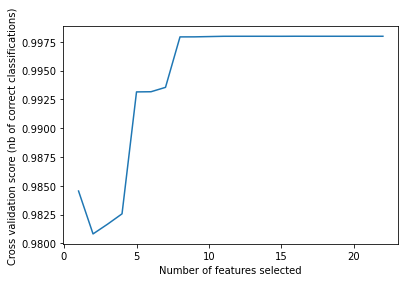

In [112]:
print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


In [144]:
# KBest
from sklearn.feature_selection import chi2, SelectKBest
print(X.shape)
X_new5 = SelectKBest(chi2, k=5).fit_transform(X, y)

# k = 5 or 8

(50000, 22)


In [148]:
from sklearn.feature_selection import chi2, SelectKBest
X_new8 = SelectKBest(chi2, k=8).fit_transform(X, y)

(50000, 22)


In [149]:
print(X_new8.shape)

(50000, 8)


In [150]:
X = np.array(X)
y = np.array(y)

In [155]:
X_new8[6]

array([0.04692988, 0.37339056, 0.11718735, 0.42857143, 0.04202365,
       0.41532546, 0.06507199, 0.94248748])

In [116]:
column_list[:]

Index(['jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'page_rank_s', 'page_rank_d', 'katz_s', 'katz_d',
       'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d'],
      dtype='object')

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new8, y, test_size = 0.2, random_state = 1, shuffle = True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, shuffle = True)

# Modelling SVM

In [157]:
import sklearn.svm as svm

model1.fit(X_train,y_train)

In [215]:
real_svm = svm.SVC(C=0.001, kernel='rbf', gamma = 0.5, probability= False)
real_svm.fit(X_train,y_train)


# {'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),
#   'kernel': ['rbf'], 'class_weight':['balanced', None]}

SVC(C=0.001, gamma=0.5)

In [216]:
prediction=real_svm.predict(X_test)

Accuracy: 0.9496


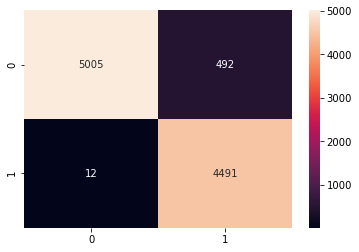

In [217]:
from sklearn import metrics

# print("Best Hyper Parameters:\n",model1.best_params_)

#Prediction
#prediction=real_svm.predict(X_test)
print("Accuracy:", metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
cm = metrics.confusion_matrix(prediction, y_test)
sns.heatmap(cm, annot = True, fmt='g')

# top5, gamma = 0.5, C = 1.0 > 1 wrong predict 27/ 0 wrong 211
# top5, gamma = 0.5, C = 0.001 > 1 wrong predict 10/ 0 wrong 601
# top 8 gamma = 0.5, C = 0.001 > 1 wrong predict 12 / 0 wrong 492

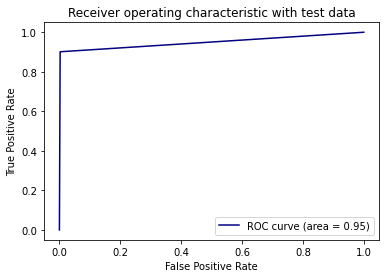

In [218]:
from sklearn.metrics import roc_curve, auc
fpr,tpr, thresholds = roc_curve(y_test, prediction)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

In [219]:
# check learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores= \
        learning_curve(real_svm, X_train, y_train, scoring='roc_auc',cv=StratifiedKFold(10),
                       train_sizes=np.linspace(.1, 1.0, 5))

In [220]:
train_scores_mean = np.mean(train_scores, axis=1)

In [221]:
valid_scores_mean= np.mean(valid_scores, axis=1)

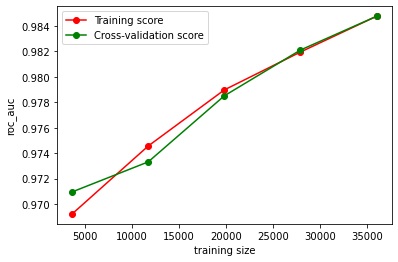

In [222]:
plt.figure()
plt.xlabel("training size")
plt.ylabel("roc_auc")
plt.plot(train_sizes, train_scores_mean, 'o-', color= "r",
             label = "Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
plt.legend(loc="best")
plt.show()

# Load test public data

In [223]:
test_public = pd.read_csv('data/features_test_public.csv', header = None)

In [224]:
tp_features_list = ['source_node', 'destination_node','jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'page_rank_s', 'page_rank_d', 'katz_s', 'katz_d',
       'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d']

test_public.columns = tp_features_list

In [225]:
#test_public = test_public[['num_followers_s', 'num_followers_d']]
#test_public = test_public[['num_followers_s', 'num_followees_s','shortest_path', 'page_rank_s', 'katz_s']]

test_public = test_public[['cosine_followers', 'num_followers_s', 'num_followees_s',\
                           'shortest_path', 'page_rank_s', 'katz_s', 'hubs_s', 'authorities_s']]

test_public = min_max_scaler.fit_transform(test_public)

In [226]:
test_public.shape

(2000, 8)

In [227]:
# real_svm = svm.SVC(C=1.0, kernel='rbf', probability= True)

real_svm = svm.SVC(C=0.001, kernel='rbf', gamma = 0.5, probability= True)

real_svm.fit(X_train,y_train)

# gamma; 10 no penalty all labels 1
# gamma; 2 1600
# gamma; 1 1600
# gamma; 0.5 $ C = 0.001 1500

SVC(C=0.001, gamma=0.5, probability=True)

In [228]:
test_public

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.78021790e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.98220051e-04, ...,
        0.00000000e+00, 5.91516108e-05, 0.00000000e+00],
       [0.00000000e+00, 2.40384615e-02, 5.17387930e-04, ...,
        2.31753349e-02, 3.79694506e-04, 1.22167017e-03],
       ...,
       [0.00000000e+00, 4.80769231e-03, 7.05528996e-05, ...,
        5.91320812e-03, 4.89261364e-05, 6.47121188e-04],
       [0.00000000e+00, 9.61538462e-03, 1.51184785e-04, ...,
        1.92737609e-02, 1.03306137e-04, 4.40506149e-01],
       [0.00000000e+00, 1.44230769e-02, 6.24897110e-04, ...,
        1.66887436e-02, 2.86893247e-04, 1.05774785e-02]])

In [229]:
prediction=real_svm.predict_proba(test_public)

In [230]:
results = []
count = 0
for i in range(len(prediction)):
    if prediction[i][1] > 0.5:
        count +=1
    results.append(prediction[i][1])

print(count)

1472


In [ ]:
'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'page_rank_s', 'page_rank_d', 'katz_s', 'katz_d',
       'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d'],
      dtype='object'

# test blocks below

# Export data

In [93]:
results = []
count = 0
for i in range(len(prediction)):
    if prediction[i][1] > 0.5:
        count +=1
    results.append(prediction[i][1])

print(count)  
# test_publis,, 1581

1581


In [94]:
file = open("test_public_results.csv", "w")
file.write("Id,Predicted\n")

for i in range(len(results)):
    file.write(str(i+1))
    file.write(",")
    file.write(str(results[i]))
    if i != len(results) -1:
        file.write("\n")
file.close()